In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

def psar(barsdata, iaf = 0.02, maxaf = 0.2):
    length = len(barsdata)
    dates = list(np.arange(length))
    high = list(barsdata['High'])
    low = list(barsdata['Low'])
    close = list(barsdata['Close'])
    psar = close[0:len(close)]
    psarbull = [None] * length
    psarbear = [None] * length
    bull = True
    af = iaf
    ep = low[0]
    hp = high[0]
    lp = low[0]
    for i in range(2,length):
        if bull:
            psar[i] = psar[i - 1] + af * (hp - psar[i - 1])
        else:
            psar[i] = psar[i - 1] + af * (lp - psar[i - 1])
        reverse = False
        if bull:
            if low[i] < psar[i]:
                bull = False
                reverse = True
                psar[i] = hp
                lp = low[i]
                af = iaf
        else:
            if high[i] > psar[i]:
                bull = True
                reverse = True
                psar[i] = lp
                hp = high[i]
                af = iaf
        if not reverse:
            if bull:
                if high[i] > hp:
                    hp = high[i]
                    af = min(af + iaf, maxaf)
                if low[i - 1] < psar[i]:
                    psar[i] = low[i - 1]
                if low[i - 2] < psar[i]:
                    psar[i] = low[i - 2]
            else:
                if low[i] < lp:
                    lp = low[i]
                    af = min(af + iaf, maxaf)
                if high[i - 1] > psar[i]:
                    psar[i] = high[i - 1]
                if high[i - 2] > psar[i]:
                    psar[i] = high[i - 2]
        if bull:
            psarbull[i] = psar[i]
        else:
            psarbear[i] = psar[i]
    return {"dates":dates, "high":high, "low":low, "close":close, "psar":psar, "psarbear":psarbear, "psarbull":psarbull}


In [2]:
gold = yf.download('gld', '2021-01-01', '2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
gold

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,181.970001,182.399994,180.960007,182.330002,182.330002,14331400
2021-01-05,182.869995,183.210007,181.820007,182.869995,182.869995,12718800
2021-01-06,181.490005,181.580002,178.240005,179.899994,179.899994,18453500
2021-01-07,179.690002,179.919998,178.839996,179.479996,179.479996,7110200
2021-01-08,176.830002,176.990005,171.479996,173.339996,173.339996,24399900
...,...,...,...,...,...,...
2021-12-27,168.960007,169.419998,168.779999,169.369995,169.369995,4760300
2021-12-28,169.330002,169.649994,168.619995,168.639999,168.639999,4541900
2021-12-29,167.360001,168.690002,167.279999,168.589996,168.589996,5889700


In [4]:
PSAR = psar(gold)

In [5]:
import matplotlib.pyplot as plt

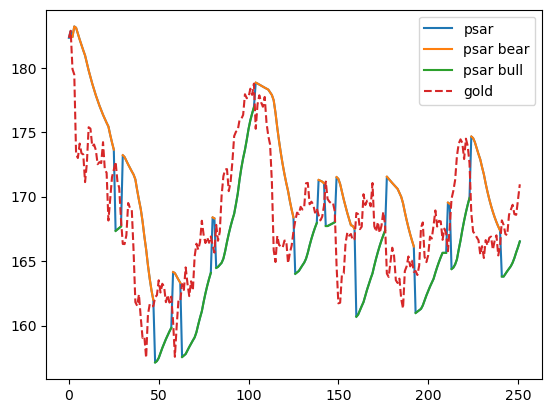

In [6]:
plt.plot(PSAR['dates'], PSAR['psar'], label='psar')
plt.plot(PSAR['dates'], PSAR['psarbear'], label='psar bear')
plt.plot(PSAR['dates'], PSAR['psarbull'], label='psar bull')
plt.plot(PSAR['dates'], PSAR['close'], label='gold', ls='--')
plt.legend(loc='best')

In [7]:
len(gold)

252

In [8]:
len(PSAR['psar'])

252